# Model building

In [9]:
import numpy as np
from matplotlib import pyplot as pl
import os
import scipy.io.wavfile as wav
from python_speech_features import mfcc

%matplotlib inline

In [10]:
PATH = './vowels/'

In [11]:
# src : https://stackoverflow.com/questions/3207219/how-do-i-list-all-files-of-a-directory
# Collect all the men files
men_files = [file for file in os.listdir(PATH) if (os.path.isfile(os.path.join(PATH, file)) and file.startswith('nam') and file.endswith('.wav'))]

# Collect all the women files
women_files = [file for file in os.listdir(PATH) if (os.path.isfile(os.path.join(PATH, file)) and file.startswith('naf') and file.endswith('.wav'))]

In [12]:
# Read all the wav files
def read_files(files):
    readed = []
    
    for file in files:
        readed.append(wav.read(os.path.join(PATH, file)))
    
    return readed

# Generate the Mel-Frequency Cepstrum Coefficients
def generate_mfcc(files):
    mfcc_array = []
    for (rate, X) in files:
        mfcc_array.append(mfcc(X, samplerate=rate, nfft=1024))
        
    return mfcc_array

men = read_files(men_files)
women = read_files(women_files)
    
men_mfcc = generate_mfcc(men)
women_mfcc = generate_mfcc(women)

In [13]:
# Calculate the mean, median and standard deviation of the features for the given array
def calculate_feature_mean(mfcc):
    feature_mean = []
    
    for feature in mfcc:
        mean = np.mean(feature,axis=0)
        feature_mean.append(mean)
    return feature_mean

def calculate_feature_std(mfcc):
    feature_std = []
    
    for feature in mfcc:
        deviation = np.std(feature,axis=0)
        feature_std.append(deviation)
    return feature_std

def calculate_feature_median(mfcc):
    feature_median = []
    
    for feature in mfcc:
        median = np.median(feature,axis=0)
        feature_median.append(median)
    return feature_median

men_feature = calculate_feature_median(men_mfcc)
women_feature = calculate_feature_median(women_mfcc)

In [14]:
#Normalize data per columns between min and max
def scale(array, min, max):
    nom = (array-array.min(axis=0))*(max-min)
    denom = array.max(axis=0) - array.min(axis=0)
    denom[denom==0] = 1
    return min + nom/denom 

men_feature = np.asarray(men_feature)
men_feature = scale(men_feature,-1,1)
women_feature = np.asarray(women_feature)
women_feature = scale(women_feature,-1,1)

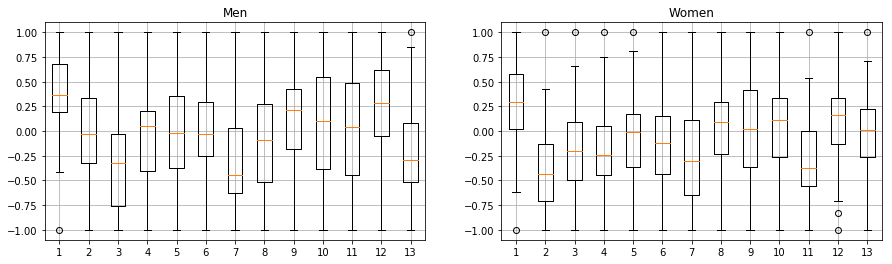

In [15]:

# Test
pl.figure(figsize=(15,4))
pl.subplot(1,2,1)
pl.boxplot(men_feature)
pl.title('Men')
pl.grid()
pl.subplot(1,2,2)
pl.boxplot(women_feature)
pl.title('Women')
pl.grid()